In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import datetime 
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
%matplotlib inline

import platform
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import style

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 십자인대, 아킬레스 카운트

In [2]:
df = pd.read_csv('nba_injury_1998.csv')
df.head()

,Date,Team,Relinquished,Notes,Notes2
0,1998-01-01,Celtics,Greg Minor,placed on IL with flu,flu
1,1998-01-02,Blazers,Dontonio Wingfield,placed on IR with left wrist tendinitis,left wrist tendinitis
2,1998-01-02,Bullets,Lorenzo Williams,placed on IL with flu / sore knees (P),flu / sore knees (P)
3,1998-01-02,Cavaliers,Mitchell Butler,placed on IL with herniated disc in neck,herniated disc in neck
4,1998-01-02,Mavericks,Chris Anstey,placed on IL with sprained left ankle,sprained left ankle


In [3]:
# 우선은 ACL과 아킬레스가 들어간  선수 구분
def yesno(x):
    words = x.split(' ')
    print(words)
    for word in words:
        if word.upper() in ['ACL', 'PCL', 'ACHILLES']:
            return True
            break   
df['tf'] = df['Notes2'].apply(lambda x:yesno(x))

['flu']
['left', 'wrist', 'tendinitis']
['flu', '/', 'sore', 'knees', '(P)']
['herniated', 'disc', 'in', 'neck']
['sprained', 'left', 'ankle']
['patella', 'tendinitis']
['flu']
['left', 'leg', 'stress', 'reaction']
['placed', 'in', 'IR', 'with', 'small', 'tear', 'in', 'right', 'hamstring']
['right', 'ankle', 'synovitis']
['sprained', 'right', 'foot']
['elbow', 'synovitis']
['sprained', 'right', 'ankle']
['sore', 'right', 'shoulder']
['hyperextended', 'left', 'knee']
['plantar', 'fasciitis', 'in', 'right', 'foot']
['strained', 'right', 'shoulder']
['left', 'knee', 'tendinitis']
['pulled', 'left', 'groin']
['fractured', 'left', 'clavicle', '(out', '6-8', 'weeks)']
['hamstring', 'injury', '(DNP)']
['sore', 'lower', 'back', '(DTD)']
['sprained', 'right', 'big', 'toe']
['strained', 'right', 'groin']
['flu']
['strained', 'right', 'calf']
['left', 'knee', 'tendinitis']
['broken', 'right', 'index', 'finger']
['surgery', 'on', 'left', 'knee', '(out', 'indefinitely)']
['patella', 'tendinitis']
[

['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'right', 'knee']
['ruptured', 'Achilles', 'tendon', '(out', 'for', 'season)']
['concussion']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'index', 'finger']
['placed', 'on', 'IL']
['upper', 'respiratory', 'infection']
['back', 'spasms']
['placed', 'on', 'IL']
['leg', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['right', 'ankle', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['toe', 'surgery']
['placed', 'on', 'IL']
['torn', 'groin']
['strained', 'neck']
['birth', 'of', 'child']
['ankle', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['ruptured', 'left', 'Achilles', 'tendon']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['torn', 'groin']
['placed', 'on'

['sore', 'right', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'leg', 'injury']
['sprained', 'left', 'ankle']
['strained', 'right', 'hamstring']
['placed', 'on', 'IL']
['hyperextended', 'right', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'knee', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['knee', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'arm', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['bruised', 'left', 'shoulder']
['thigh', 'injury']
['sprained', 'wrist']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'left', 'calf']
['back', 'spasms']
['placed', 'on', 'IL']
['sore', 'left', 'knee']
['strained', 'groin']
['

['left', 'knee', 'injury']
['bruised', 'tailbone']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['strained', 'left', 'hamstring']
['sore', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'left', 'knee']
['bruised', 'right', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['neck', 'injury']
['bruised', 'left', 'hip']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['dislocated', 'patella', 'in', 'right', 'knee', '(surgery,', 'out', 'for', 'season)']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['ankle', 'injury']
['sore', 'back']
['foot', 'injury', '/', 'rest'

['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'left', 'knee']
['plantar', 'fasciaitis']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['toe', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'to', 'repait', 'hernia', '/', 'back', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'right', 'hamstring']
['strained', 'right', 'calf']
['sprained', 'right', 'ankle/foot']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'leg', 'to', 'repair', 'fractured', 'tibia', 'and', 'fibula']
['stress', 'fracture', 'in', 'lower', 'back']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['fractured', 'left', 'thumb']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'left', 'ankle']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'toe']
['fractured', 'left',

['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['illness']
['illness']
['bruised', 'left', 'hand']
['placed', 'on', 'IL']
['sore', 'lower', 'back', '/', 'back', 'spasms']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'right', 'ankle']
['placed', 'on', 'IL']
['strained', 'right', 'calf']
['flu']
['back', 'spasms']
['placed', 'on', 'IL']
['torn', 'meniscus', 'in', 'left', 'knee', '(out', 'for', 'season)']
['hyperextended', 'left', 'knee']
['sore', 'right', 'knee']
['torn', 'right', 'hamstring']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['bruised', 'quadriceps', '/', 'sore', 'knee', '(DTD)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['back', 'injury']
['sprained', 'MCL', 'in', 'left', 'knee']
['illness']
['placed', 'on', 'IL']
['illness']
['placed', 'on', 'IL']
['concussion']
['placed', 'on', 'IL', 'for', 'rest']
['sprained', 'right', 'elbow']
['hamstring', 'injury', '/', 'rest']
['sprained', 'left', 'ankle']
['sprained

['strained', 'left', 'calf']
['torn', 'left', 'Achilles', 'tendon', '(out', 'for', 'season)']
['left', 'oblique', 'injury']
['placed', 'on', 'IL']
['left', 'Achilles', 'injury']
['right', 'hand', 'injury']
['sore', 'right', 'knee']
['strained', 'left', 'hamstring']
['strained', 'right', 'adductor']
['left', 'eye', 'injury']
['sore', 'left', 'hip']
['tailbone', 'injury']
['sprained', 'right', 'ankle']
['strained', 'lower', 'back']
['right', 'quadricep', 'injury']
['placed', 'on', 'IL']
['sore', 'right', 'ankle']
['left', 'hand', 'injury']
['sprained', 'left', 'ankle']
['illness']
['left', 'hamstring', 'injury']
['bruised', 'right', 'knee']
['flu']
['illness']
['sore', 'back']
['sore', 'left', 'knee']
['concussion']
['illness']
['concussion']
['placed', 'on', 'IL']
['right', 'fibula', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['illness']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['illnes

In [4]:
import re

# 시즌아웃 부상
def seasonout(x):
    words = re.split('\(|\)', x)
    print(words)
    for word in words:
        if word in ['out for season']:
            return True
            break
    
df['out']  = df['Notes2'].apply(lambda x:seasonout(x))
    

['flu']
['left wrist tendinitis']
['flu / sore knees ', 'P', '']
['herniated disc in neck']
['sprained left ankle']
['patella tendinitis']
['flu']
['left leg stress reaction']
['placed in IR with small tear in right hamstring']
['right ankle synovitis']
['sprained right foot']
['elbow synovitis']
['sprained right ankle']
['sore right shoulder']
['hyperextended left knee']
['plantar fasciitis in right foot']
['strained right shoulder']
['left knee tendinitis']
['pulled left groin']
['fractured left clavicle ', 'out 6-8 weeks', '']
['hamstring injury ', 'DNP', '']
['sore lower back ', 'DTD', '']
['sprained right big toe']
['strained right groin']
['flu']
['strained right calf']
['left knee tendinitis']
['broken right index finger']
['surgery on left knee ', 'out indefinitely', '']
['patella tendinitis']
['left knee tendinitis']
['left knee tendinitis']
['strained groin']
['strained abdomen & pulled groin']
['right ankle tendinitis']
['strained right hamstring']
['left knee patellar tendi

['sprained left ankle']
['sore lower back']
['left knee injury']
['sprained left ankle']
['right knee tendinitis']
['back spasms']
['knee tendinitis']
['a sprained right ankle']
['plantar fasciitis in left foot']
['strained right groin']
['strained right calf']
['right patella tendinitis']
['broken right thumb']
['a sprained right ankle']
['a bruised right ankle']
['sore left knee ', 'patellofemoral arthritis in left knee', '']
['sore right knee']
['strained right Achilles tendon']
['strained left calf']
['right knee tendinitis']
['sprained left ankle']
['high left ankle sprain ', 'expected to be out 4-6 weeks', '']
['strained right hamstring']
['bruised left knee']
['placed on IL recovering from surgery on left wrist ', 'out for season', '']
['torn ligaments in left ankle ', 'out 4+ weeks', '']
['sprained right ankle']
['a sore lower back']
['fractured left thumb']
['plantar fasciitis in left foot']
['a right elbow laceration']
['left Achilles tendinitis']
['sore right knee']
['left k

['suspension']
['strained right shoulder']
['placed on IL']
['placed on IL']
['placed on IL']
['sprained left ankle']
['sprained MCL in right knee']
['torn cartilage in right knee']
['strained right calf']
['elbow injury']
['abdominal strain']
['placed on IL']
['broken right thumb']
['placed on IL']
['facial abscess']
['placed on IL']
['sprained right foot']
['strained muscle in left shoulder']
['placed on IL for being late for shoot around']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['sore shoulder']
['strained right calf']
['placed on IL']
['death in family']
['flu']
['bruised left knee']
['placed on IL']
['sore ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['strained right groin']
['placed on IL']
['sprained left elbow']
['sore right shoulder']
['placed on IL']
['flu']
['placed on IL']
['medial tibia bone bruise']
['sprained right ankle']
['bruised ribs']
['bruised thigh']
['placed on IL']
['de

['placed on IL']
['strained left shoulder']
['placed on IL']
['placed on IL']
['placed on IL']
['sore lower back']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['strained right hamstring']
['back spasms']
['stomach flu / dehydration']
['placed on IL']
['placed on IL']
['sore left knee']
['placed on IL']
['dislocated left knee cap']
['placed on IL']
['placed on IL']
['flu-like symptoms']
['placed on IL']
['flu']
['sore back']
['sprained neck']
['sore left Achilles tendon']
['placed on IL']
['back spasms']
['placed on IL']
['bruised left knee']
['placed on IL']
['placed on IL']
['bruised left knee']
['placed on IL']
['hand injury']
['placed on IL']
['placed on IL']
['placed on IL']
['broken right foot']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['left Achilles tendinitis']
['placed on IL']
['placed on IL']
['sore right foot']
['sore left knee']
['placed on IL']
['placed on IL']
['sore left hip & leg']
['sore left knee']
['

['placed on IL']
['placed on IL']
['placed on IL']
['strained right hip flexor']
['placed on IL']
['strained right calf']
['strained right hamstring']
['placed on IL']
['placed on IL']
['flu']
['strained lower back']
['placed on IL for tests on heart']
['placed on IL']
['sore left foot']
['placed on IL']
['sprained right ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['flu']
['hand injury']
['stress fracture in left foot']
['rib injury']
['left ankle injury']
['placed on IL']
['sprained big toe']
['flu']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['bruised tailbone']
['sprained left ankle']
['flu']
['stiff neck']
['strained right hamstring']
['sprained right ankle']
['sprained right ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['right knee tendinitis']
['placed on IL']
['left knee injury']
['dislocated left ring finger']
['placed on IL']
['place

['sore left hamstring']
['placed on IL recovering from surgery to repair torn right Achilles tendon ', 'out for season', '']
['placed on IL recovering from surgery on right foot to repair broken fifth metatarsal ', 'out for season', '']
['placed on IL recovering from arthroscopic surgery on right kene to repair torn meniscus']
['placed on IL']
['placed on IL']
['placed on IL']
['strained right plantaris muscle / calf injury ', 'CBC', '']
['placed on IL']
['stress reaction in lower left leg']
['placed on IL recovering from surgery on back']
['bruised left quadriceps']
['placed on IL recovering from surgery on left wrist']
['placed on IL']
['placed on IL recovering from surgery to repair fractured right index finger']
['placed on IL']
['placed on IL']
['sprained right ankle']
['torn ACL in left knee']
['placed on IL']
['left knee injury']
['bruised tailbone']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on

['placed on IL']
['strained neck']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['sore left hamstring']
['sore left shoulder']
['bruised left heel']
['illness']
['broken left hand']
['torn MCL in right knee']
['placed on IL']
['toe injury']
['placed on IL']
['flu-like symptoms']
['illness / flu']
['placed on IL']
['torn lateral meniscus in right knee']
['calf injury']
['calf injury']
['placed on IL']
['broken bone in left hand']
['placed on IL']
['placed on IL']
['bruised knee']
['right ankle inijury']
['right ankle injury']
['placed on IL']
['placed on IL']
['right ankle injury']
['groin injury']
['placed on IL']
['back spasms']
['placed on IL']
['sprained left ankle']
['placed on IL']
['sore right foot ', 'out for season', '']
['placed on IL']
['right knee tendinitis']
['sore lower back']
['sprained left elbow']
['placed on IL']
['placed on IL']
['torn left hamstring']
['sprained/bruised left shoulder']
['placed on IL']
['surgery to repair torn

['placed on IL']
['placed on IL']
['sore knee']
['fractured right foot ', 'out for season', '']
['placed on IL']
['fractured right hand']
['stomach virus']
['placed on IL']
['strained left hamstring']
['placed on IL']
['placed on IL']
['leg injury']
['fractured right foot']
['sore knee']
['bruised right hip']
['placed on IL recovering from arthroscopic surgery on right knee']
['torn right pectoral muscle ', 'out for season', '']
['strained right groin']
['placed on IL']
['strained left hamstring']
['back injury']
['bone bruise in right knee']
['placed on IL']
['placed on IL']
['bruised left knee']
['placed on IL']
['placed on IL']
['sprained left ankle']
['placed on IL']
['sore quadriceps']
['placed on IL for rest']
['concussion / herniated disc in neck ', 'out for season', '']
['strep throat']
['separated right shoulder']
['placed on IL']
['placed on IL']
['back spasms']
['placed on IL']
['sore left knee']
['placed on IL']
['sprained right knee']
['bruised right shoulder']
['bruised r

['placed on IL for rest']
['quadriceps injury']
['placed on IL']
['back injury']
['Achilles injury ', 'out for season', '']
['placed on IL']
['back injury']
['sprained left knee']
['placed on IL']
['placed on IL']
['placed on IL ', 'out for season', '']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL ', 'out for season', '']
['concussion']
['placed on IL ', 'out for season', '']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['sprained right knee ', 'out for season', '']
['left big toe injury ', 'out for season', '']
['placed on IL']
['strained left knee/quadriceps']
['flu']
['sore back ', 'out for season', '']
['placed on IL']
['sprained right ankle']
['placed on IL ', 'out for season', '']
['placed on IL recovering from surgery to repair facial fracture near left eye']
['placed on IL']
['placed on IL']
['placed on IL recoveruing from surgery on left shoulder to repair separation ', 'out for season', '']
['strained hamstring']
['placed on IL']
['

['sprained right ankle']
['illness']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['sore/sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['concussion']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['Achilles injury / sprained ankle / illness']
['placed on IL']
['placed on IL']
['hyperextended/strained right knee']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['illness']
['flu / strep throat']
['placed on IL']
['placed on IL for rest']
['bruised left hip']
['sore left big toe']
['placed on IL']
['bruised left hip']
['sore left Achilles']
['placed on IL']
['placed on IL']
['sore left knee']
['placed on IL']
['placed on IL']
['knee injury']
['strained rotator cuff in left shoulder / rest']
['conc

['placed on IL']
['placed on IL']
['sprained MCL in left knee']
['placed on IL']
['placed on IL']
['placed on IL']
['strained left knee']
['right eye inflammation']
['placed on IL']
['placed on IL']
['sore right shoulder']
['sprained right ankle']
['placed on IL']
['placed on IL']
['strained adductor in left groin']
['bruised left hip']
['bruised right calf']
['placed on IL']
['torn meniscus in left knee']
['placed on IL']
['strained lower back']
['concussion']
['placed on IL for rest']
['right ankle injury']
['left quadriceps injury']
['sprained right ankle']
['bruised shin']
['placed on IL']
['sprained right ankle ', 'DTD', '']
['placed on IL']
['placed on IL for rest']
['placed on IL for rest']
['bruised lower back']
['placed on IL recovering form surgery on thumb']
['bruised quadriceps']
['bruised left gluteus muscle']
['sore left elbow']
['left ankle injury']
['fractured fibula in left leg']
['sprained left ankle']
['sore right shoulder']
['placed on IL']
['placed on IL']
['placed

['concussion']
['sprained left foot']
['back injury']
['strained right adductor']
['fractured left thumb']
['bruised left knee']
['fractured left hand']
['placed on IL']
['stress reaction in right foot']
['illness']
['sprained left ankle']
['right thumb injury ', 'surgery', '']
['fractured right hand']
['finger injury']
['sprained left ankle']
['sore right knee']
['sore right shoulder']
['right eye injury']
['back injury']
['left thigh injury']
['left calf injury']
['strained rotator cuff in left shoulder']
['right leg injury']
['sprained right ankle']
['concussion']
['placed on IL for personal reasons']
['bruised left knee']
['sore lower back']
['right groin injury']
['sprained left ankle']
['sprained left thumb']
['illness']
['placed on IL recovering from surgery on sinus']
['bruised lower back']
['right shoulder injury']
['strained right hamstring']
['right groin injury']
['right hip flexor injury']
['shin injury']
['sprained right ankle']
['placed on IL']
['placed on IL']
['hip inj

In [5]:
def yesno2(x):
    words = x.split(' ')
    print(words)
    sum_sum = 0
    for word in words:
        if word.upper() in ['ACL', 'PCL', 'ACHILLES'] or word.upper() in['TORN','RUPTURE']:
            sum_sum += 1
        if sum_sum >= 2:
            return True
            break   
df['tf2'] = df['Notes2'].apply(lambda x:yesno2(x))

['flu']
['left', 'wrist', 'tendinitis']
['flu', '/', 'sore', 'knees', '(P)']
['herniated', 'disc', 'in', 'neck']
['sprained', 'left', 'ankle']
['patella', 'tendinitis']
['flu']
['left', 'leg', 'stress', 'reaction']
['placed', 'in', 'IR', 'with', 'small', 'tear', 'in', 'right', 'hamstring']
['right', 'ankle', 'synovitis']
['sprained', 'right', 'foot']
['elbow', 'synovitis']
['sprained', 'right', 'ankle']
['sore', 'right', 'shoulder']
['hyperextended', 'left', 'knee']
['plantar', 'fasciitis', 'in', 'right', 'foot']
['strained', 'right', 'shoulder']
['left', 'knee', 'tendinitis']
['pulled', 'left', 'groin']
['fractured', 'left', 'clavicle', '(out', '6-8', 'weeks)']
['hamstring', 'injury', '(DNP)']
['sore', 'lower', 'back', '(DTD)']
['sprained', 'right', 'big', 'toe']
['strained', 'right', 'groin']
['flu']
['strained', 'right', 'calf']
['left', 'knee', 'tendinitis']
['broken', 'right', 'index', 'finger']
['surgery', 'on', 'left', 'knee', '(out', 'indefinitely)']
['patella', 'tendinitis']
[

['bruised', 'kidney']
['left', 'quadriceps', 'tendinitis']
['right', 'knee', 'injury']
['bruised', 'right', 'shoulder']
['back', 'spasms']
['bone', 'bruise', 'in', 'right', 'foot']
['turf', 'toe']
['left', 'knee', 'tendinitis']
['strained', 'right', 'hip', 'flexor']
['sprained', 'left', 'ankle']
['back', 'spasms']
['bruised', 'left', 'quadricep']
['placed', 'on', 'IL']
['back', 'spasms']
['sprained', 'right', 'ankle']
['plantar', 'fasciaitis', 'in', 'right', 'foot']
['migraine', 'headaches']
['thoracic', 'spine', 'dysfunction']
['sprained', 'left', 'foot']
['left', 'Achilles', 'tendinitis']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['sprained', 'left', 'ankle']
['flu-like', 'symptoms']
['sprained', 'right', 'ankle']
['sore', 'left', 'hamstring']
['left', 'knee', 'tendinitis']
['strained', 'right', 'shoulder']
['strained', 'lower', 'back']
['sprained', 'MCL', 'in', 'right', 'knee']
['left', 'ankle', 'tendinitis']
['left', 'hip', 'pointer']
['sore', 'right', 'knee']
['right',

['bruised', 'tailbone']
['broken', 'right', 'wrist']
['sprained', 'right', 'ankle']
['sore', 'left', 'foot']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'left', 'quadricep']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['hamstring', 'injury']
['ankle', 'injury']
['placed', 'on', 'IL']
['sore', 'left', 'knee']
['sports', 'hernia']
['stress', 'fracture', 'in', 'right', 'foot']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'wrist']
['placed', 'on', 'IL']
['knee', 'injury']
['sprained', 'neck']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'MCL', 'in', 'left', 'knee']
['placed', 'on', 'IL']
['stomach', 'virus']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on

['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['hyperextended', 'left', 'knee']
['suspension']
['strained', 'left', 'Achilles', 'tendon']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'right', 'hamstring']
['strained', 'right', 'calf']
['plantar', 'fasciitis', 'in', 'right', 'foot']
['sprained', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['broken', 'left', 'index', 'finger']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['stress', 'reaction', 'in', 'left', 'kneecap']
['sore', 'back']
['bruised', 'left', 'thigh']
['left', 'hip', 'inflammation']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'left', 'quadricep']
['placed

['sore', 'back']
['placed', 'on', 'IL', 'for', 'rest']
['placed', 'on', 'IL']
['ankle', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['placed', 'on', 'IL']
['sore', 'right', 'hip']
['placed', 'on', 'IL', 'for', 'rest']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'knee']
['back', 'spasms', '(out', 'for', 'season)']
['back', 'spasms']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['hip', 'pointer']
['placed', 'on', 'IL']
['sore', 'right', 'hamstring']
['sore', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'back', '(out', 'for', 'season)']
['sprained', 'right', 'ankle']
['placed', 'on', 'IL']
['sore', 'lower', 'back']
['placed', 'on', 'IL']
['knee', 'tendinitis', '(out', 'for', 'season)']
['hairline', 'fracture', 'of', 'right', 'leg']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL'

['right', 'knee', 'tendinitis', '(P)', '/', 'sore', 'left', 'foot', '(CBC)']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL', '(P)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'back']
['placed', 'on', 'IL']
['sprained', 'right', 'knee']
['partially', 'torn', 'right', 'quadriceps']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'hamstring']
['swollen', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'ankle', 'injury']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'thumb', 'to', 'repair', 'torn', 'ligament']
['sprained', 'right', 'ankle']
['sprained', 'ankle']
['sprained', 'left', 'ankle']
['sprained', 'left', 'ankle']
['right', 'knee', 'tendinitis']
['lacerated', 'right', 'ring', 'finger']
['placed', 'on', 'IL']
['abdominal', 'strain']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['broken', 'bone', 'in', 'left', 'foot']
['concussion']
['placed

['placed', 'on', 'IL', '(P)']
['placed', 'on', 'IL']
['back', 'spasms', '/', 'herniated', 'disc', 'in', 'back', '(out', 'for', 'season)']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'to', 'repair', 'facial', 'fracture']
['placed', 'on', 'IL']
['strained', 'left', 'groin']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'right', 'ankle']
['placed', 'on', 'IL']
['strained', 'left', 'hamstring']
['stomach', 'virus']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'for', 'rest']
['sore', 'groin']
['flu']
['placed', 'on', 'IL']
['sore', 'right', 'Achilles', 'tendon', '(out', 'for', 'season)']
['sprained', 'left', 'ankle', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['strained', 'right', 'calf']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'right', 'foot']
['groin', 'injury', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['groin', 'injury']
['placed', 'on', 'IL']
['thigh', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL', '(out', 'for', 'season)']
['p

['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'right', 'hamstring']
['strained', 'right', 'calf']
['sprained', 'right', 'ankle/foot']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'leg', 'to', 'repair', 'fractured', 'tibia', 'and', 'fibula']
['stress', 'fracture', 'in', 'lower', 'back']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['fractured', 'left', 'thumb']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'left', 'ankle']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'toe']
['fractured', 'left', 'foot']
['ankle', 'injury']
['sore', 'right', 'hip']
['stress', 'reaction', 'in', 'back']
['strained', 'left', 'hamstring']
['fractured', 'left', 'wrist']
['placed', 'on', 'IL', 'recovering', 'from', 'microdisectomy', 'surgery', 'on', 'lower', 'back', 'to', 'repair', 'herniated', 'disc']
['placed', 'on', 'IL']
['stra

['ankle', 'injury']
['placed', 'on', 'IL', 'for', 'rest']
['placed', 'on', 'IL']
['illness']
['placed', 'on', 'IL', '(P)']
['placed', 'on', 'IL', '(P)']
['ankle', 'injury']
['hamstring', 'injury']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL', 'for', 'rest']
['placed', 'on', 'IL', 'for', 'rest']
['placed', 'on', 'IL']
['ankle', 'injury']
['placed', 'on', 'IL']
['strained', 'lower', 'back']
['sprained', 'right', 'ankle']
['illness']
['placed', 'on', 'IL', '(P)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['strained', 'left', 'calf']
['sore', 'right', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'thumb', 'to', 'repair', 'torn', 'ligament']
['placed', 'on', 'IL']
['ankle', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'hamstring']
['placed', 'on', 'IL']
['inflam

['sore', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'for', 'rest']
['placed', 'on', 'IL']
['heart', 'arrhythmia']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['right', 'groin', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'right', 'foot']
['strained', 'right', 'calf']
['sore', 'left', 'knee']
['sore', 'lower', 'back']
['placed', 'on', 'IL']
['sore', 'left', 'foot']
['placed', 'on', 'IL', 'for', 'rest']
['placed', 'on', 'IL']
['left', 'thigh', 'injury']
['left', 'knee', 'injury']
['sprained', 'right', 'ankle', '/', 'illness', '(DTD)']
['placed', 'on', 'IL']
['illness']
['recovering', 'from', 'arthroscopic', 'surgery', 'on', 'left', 'shoulder', 'to', 'repair', 'injured', 'labrum', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['placed', 'on'

['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'right', 'calf']
['sore', 'lower', 'abdominal']
['sprained', 'right', 'ankle']
['sore', 'right', 'ankle']
['placed', 'on', 'IL']
['right', 'hand', 'injury']
['strained', 'right', 'groin']
['strained', 'back']
['sore', 'left', 'knee']
['bruised', 'right', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'left', 'knee', 'to', 'repair', 'torn', 'patellar', 'tendon', '(out', 'for', 'season)']
['placed', 'on', 'IL', 'for', 'rest']
['right', 'calf', 'injury']
['placed', 'on', 'IL']
['strained', 'left', 'oblique']
['illness']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'right', 'groin/hamstring']
['sore', 'left', 'groin']
['strained', 'right', 'calf']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'to', 'repair', 'torn', 'left', 'Achilles', 'tendon', '(out', 'for', 'season)']
['sore', 'right', 'knee']

['illness']
['strained', 'right', 'groin']
['right', 'foot', 'injury']
['placed', 'on', 'IL']
['flu']
['left', 'hamstring', 'injury']
['bruised', 'right', 'knee']
['nose', 'injury']
['surgery', 'on', 'finger']
['illness']
['illness']
['placed', 'on', 'IL']
['right', 'hip', 'injury']
['sprained', 'left', 'thumb']
['strained', 'left', 'calf']
['torn', 'left', 'Achilles', 'tendon', '(out', 'for', 'season)']
['left', 'oblique', 'injury']
['placed', 'on', 'IL']
['left', 'Achilles', 'injury']
['right', 'hand', 'injury']
['sore', 'right', 'knee']
['strained', 'left', 'hamstring']
['strained', 'right', 'adductor']
['left', 'eye', 'injury']
['sore', 'left', 'hip']
['tailbone', 'injury']
['sprained', 'right', 'ankle']
['strained', 'lower', 'back']
['right', 'quadricep', 'injury']
['placed', 'on', 'IL']
['sore', 'right', 'ankle']
['left', 'hand', 'injury']
['sprained', 'left', 'ankle']
['illness']
['left', 'hamstring', 'injury']
['bruised', 'right', 'knee']
['flu']
['illness']
['sore', 'back']
['

In [6]:
def oneOrzero(x):
    two=0
    three=0
    if x['out'] == True:
        two = 1
    if  x['tf2'] == True:
        three = 1
    print(two, three)    
    return  pd.Series([two,three])
df[['outnum','tf2num']] = df[['out','tf2']].apply(oneOrzero,axis=1)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
1 0
0 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0


In [7]:
df_sum = df.groupby('Relinquished',as_index=False).agg({'outnum':'sum','tf2num':'sum'})

# 다른 데이터들과 합치기

In [8]:
injury_df = pd.read_csv('nba_injury_merge_position.csv')

injury_df.head()

,name,age,season,Notes,position
0,Tony Parker,37,18,50.0,G
1,Manu Ginobili,41,16,44.0,G
2,Dwyane Wade,37,16,43.0,G
3,Andrew Bogut,36,14,36.0,C
4,Sean Marks,36,11,35.0,F-C


In [9]:
df_merge1 = pd.merge(df_sum,injury_df,left_on='Relinquished',right_on='name').drop('name',axis=1)
df_merge1.head()

,Relinquished,outnum,tf2num,age,season,Notes,position
0,Aaron Brooks,0,0,35,10,9.0,G
1,Aaron Gray,0,0,30,7,14.0,C
2,Adam Morrison,1,1,29,3,8.0,F
3,Adonal Foyle,1,0,35,12,18.0,C
4,Al Harrington,0,1,35,16,15.0,F


In [10]:
nba_all = pd.read_csv('all_seasons.csv').drop('Unnamed: 0',axis=1)
nba_all.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [11]:
import math
# 평균을 구하고 모두 소수 2번쨰까지만 살리기
nba_all_group = nba_all.groupby('player_name',as_index=False).mean()
for i in range(nba_all_group.shape[0]):
    for i2 in range(len(list(nba_all_group.columns))):
        if i2 == 0:
            continue
        elif i2 == 1:
            nba_all_group.iloc[i,i2] =  nba_all_group.iloc[i,i2].astype('int64')
        else:
            nba_all_group.iloc[i,i2] = round(nba_all_group.iloc[i,i2],2)

nba_all_group['age'] = nba_all_group['age'].astype('int64')
nba_all_group.head()

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,A.C. Green,35,205.74,102.06,75.80,5.78,6.06,0.86,-1.88,0.09,0.19,0.13,0.49,0.05
1,A.J. Bramlett,23,208.28,102.97,8.00,1.00,2.80,0.00,-32.60,0.16,0.21,0.15,0.19,0.00
2,A.J. Guyton,24,185.42,81.65,26.67,3.80,0.70,1.57,-6.70,0.01,0.04,0.22,0.32,0.28
3,AJ Hammons,24,213.36,117.93,22.00,2.20,1.60,0.20,-0.60,0.05,0.20,0.17,0.47,0.04
4,AJ Price,25,187.96,84.82,43.50,5.35,1.33,2.00,-2.23,0.02,0.09,0.21,0.48,0.25


In [12]:
df_merge = pd.merge(df_merge1,nba_all_group,left_on='Relinquished',right_on='player_name',how='left').\
drop('age_y',axis=1).rename(columns={'age_x':'age'})

df_merge.drop('player_name',axis=1,inplace=True)

df_merge['Notes'] = df_merge['Notes'].astype(int)
df_merge.head()

,Relinquished,outnum,tf2num,age,season,Notes,position,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Aaron Brooks,0,0,35,10,9,G,182.88,73.03,64.50,8.88,1.55,2.76,-3.31,0.02,0.07,0.22,0.52,0.23
1,Aaron Gray,0,0,30,7,14,C,213.36,122.47,45.43,3.24,3.73,0.66,-4.73,0.13,0.23,0.15,0.53,0.09
2,Adam Morrison,1,1,29,3,8,F,203.20,92.99,53.67,6.07,1.80,1.17,-7.83,0.03,0.10,0.19,0.44,0.11
3,Adonal Foyle,1,0,35,12,18,C,208.28,118.88,61.08,3.78,4.48,0.44,-4.40,0.11,0.19,0.13,0.50,0.04
4,Al Harrington,0,1,35,16,15,F,205.74,112.49,61.31,12.20,5.13,1.52,-1.45,0.06,0.17,0.23,0.51,0.10


# Tensorflow Regression

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import seaborn as sns

print(tf.__version__)

2.1.0


# 문자로 된 행들 라벨링

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# object인 컬럼만 찾기
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Relinquished   157 non-null    object 
 1   outnum         157 non-null    int64  
 2   tf2num         157 non-null    int64  
 3   age            157 non-null    int64  
 4   season         157 non-null    int64  
 5   Notes          157 non-null    int32  
 6   position       157 non-null    object 
 7   player_height  157 non-null    float64
 8   player_weight  157 non-null    float64
 9   gp             157 non-null    float64
 10  pts            157 non-null    float64
 11  reb            157 non-null    float64
 12  ast            157 non-null    float64
 13  net_rating     157 non-null    float64
 14  oreb_pct       157 non-null    float64
 15  dreb_pct       157 non-null    float64
 16  usg_pct        157 non-null    float64
 17  ts_pct         157 non-null    float64
 18  ast_pct   

In [15]:
encoder = LabelEncoder()
encoder.fit(list(df_merge['Relinquished']))
digit_label_Relinquished = encoder.transform(df_merge['Relinquished'])
print(digit_label_Relinquished)

encoder.fit(list(df_merge['position']))
digit_label_position = encoder.transform(df_merge['position'])
print(digit_label_position)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156]
[5 0 2 0 2 0 5 2 2 0 2 5 5 2 3 1 2 1 5 2 2 2 2 3 5 5 5 5 1 5 6 2 5 5 2 0 5
 3 2 0 4 5 2 4 5 3 5 0 2 2 6 3 5 2 0 0 6 2 2 0 0 5 2 5 5 5 3 2 2 0 2 5 2 5
 2 5 5 2 5 5 3 5 4 0 2 6 6 5 5 2 2 2 0 5 4 2 2 1 1 1 5 6 2 0 3 5 5 0 2 2 0
 2 5 3 5 5 5 2 2 2 2 5 0 0 5 2 0 3 1 2 0 5 6 6 4 5 5 5 5 5 2 0 1 1 0 6 5 5
 6 2 6 0 5 0 2 2 0]


In [16]:
# 새로운 컬럼으로 넣어주기
df_merge['Relinquished_digit'] = digit_label_Relinquished
df_merge['position_digit'] = digit_label_position
df_merge_renew  = df_merge.drop(['Relinquished','position'],axis=1)

df_merge_renew.head()

,outnum,tf2num,age,season,Notes,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Relinquished_digit,position_digit
0,0,0,35,10,9,182.88,73.03,64.50,8.88,1.55,2.76,-3.31,0.02,0.07,0.22,0.52,0.23,0,5
1,0,0,30,7,14,213.36,122.47,45.43,3.24,3.73,0.66,-4.73,0.13,0.23,0.15,0.53,0.09,1,0
2,1,1,29,3,8,203.20,92.99,53.67,6.07,1.80,1.17,-7.83,0.03,0.10,0.19,0.44,0.11,2,2
3,1,0,35,12,18,208.28,118.88,61.08,3.78,4.48,0.44,-4.40,0.11,0.19,0.13,0.50,0.04,3,0
4,0,1,35,16,15,205.74,112.49,61.31,12.20,5.13,1.52,-1.45,0.06,0.17,0.23,0.51,0.10,4,2


In [30]:
train_set = df_merge_renew.sample(frac=.8, random_state=0)
test_set = df_merge_renew.drop(train_set.index)

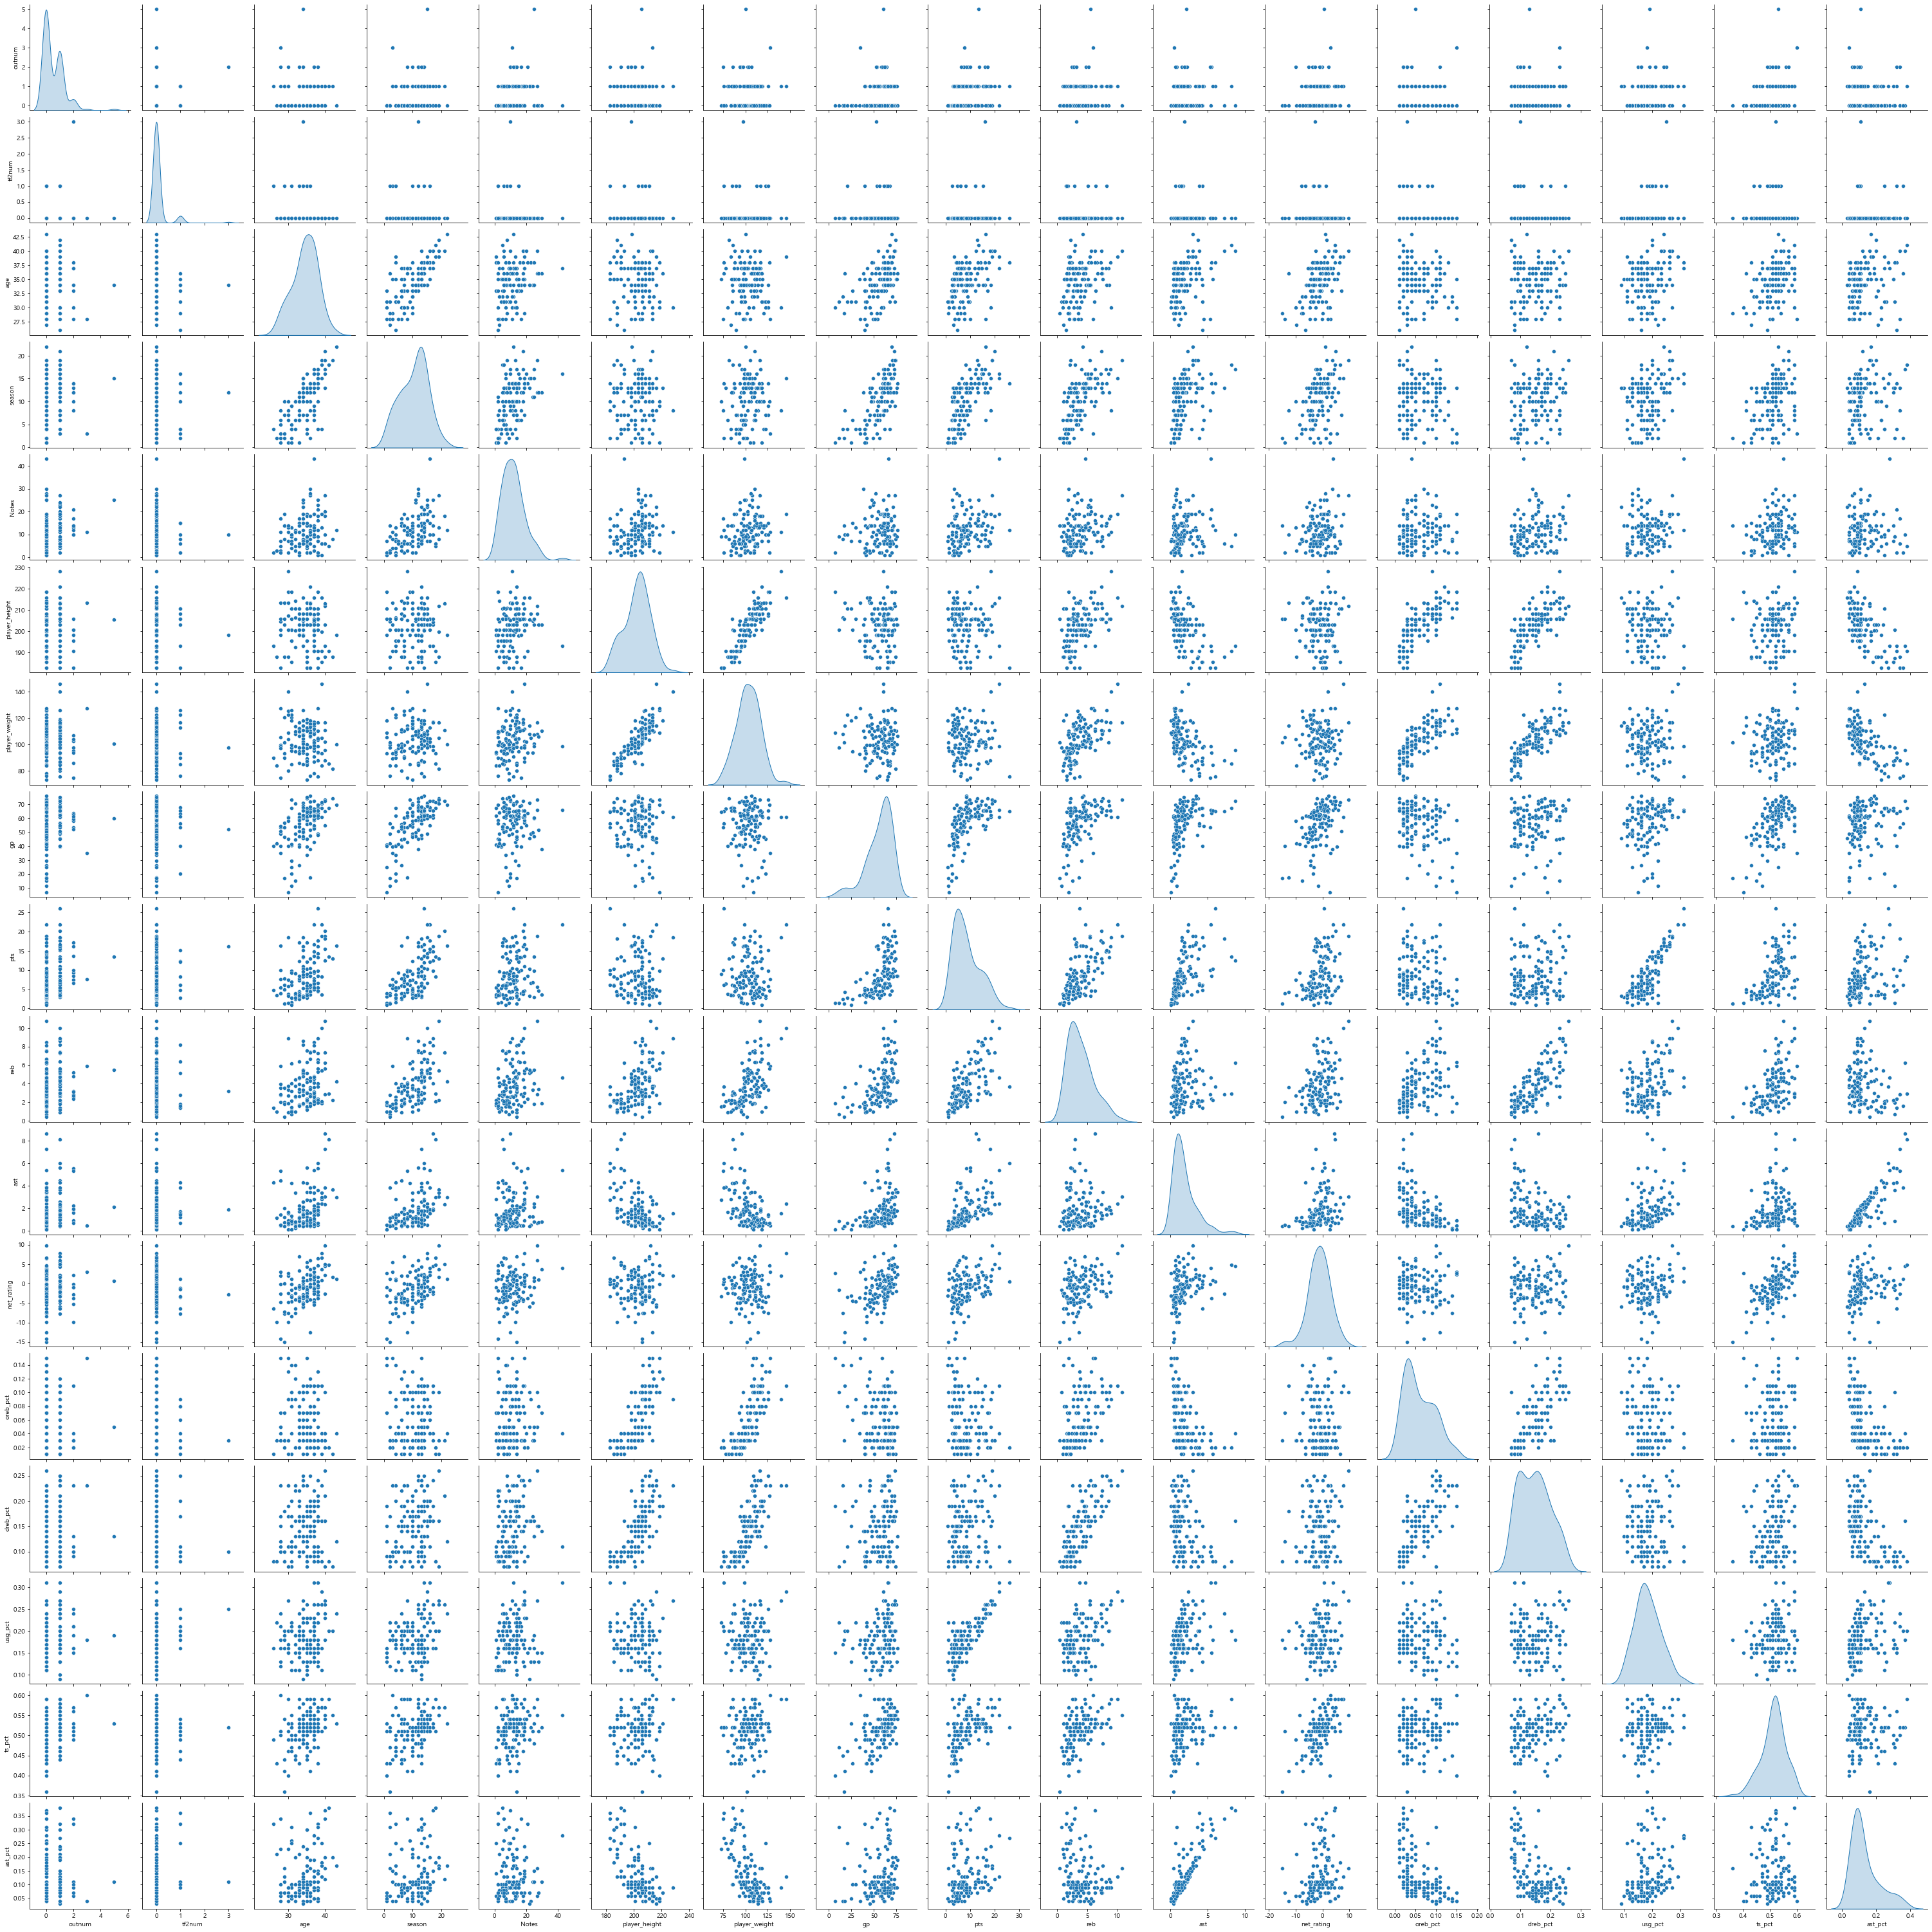

In [18]:
# sns.pairplot(train_set[['Relinquished', 'outnum', 'tf2num', 'age', 'season', 'Notes',
#        'position', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
#        'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']], diag_kind='kde')

In [31]:
train_state = train_set.describe().T
train_state

,count,mean,std,min,25%,50%,75%,max
outnum,126.0,0.531746,0.766149,0.00,0.0000,0.000,1.0000,5.00
tf2num,126.0,0.087302,0.358214,0.00,0.0000,0.000,0.0000,3.00
age,126.0,34.563492,3.421102,26.00,33.0000,35.000,37.0000,43.00
season,126.0,10.460317,4.814396,1.00,7.0000,12.000,14.0000,22.00
Notes,126.0,11.825397,7.109520,1.00,7.0000,11.000,15.0000,43.00
player_height,126.0,202.200714,9.204664,182.88,196.1650,203.200,208.2800,228.28
player_weight,126.0,103.181111,13.269453,73.03,94.8575,102.560,111.5800,145.91
gp,126.0,55.845317,14.419113,7.00,48.1900,60.330,65.9100,76.00
pts,126.0,8.637540,5.382379,0.90,4.3275,7.390,12.3475,26.06
reb,126.0,3.885317,2.167152,0.40,2.1775,3.405,5.1100,10.77


In [32]:
y_train = train_set.pop('age')
y_test = test_set.pop('age')

In [33]:
def norm(x):
    return (x - train_state['mean']) / train_state['std']

norm_train_set = norm(train_set)
norm_test_set = norm(test_set)

In [34]:
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[len(train_set.keys())]),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)
])

In [35]:
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='mse', optimizer = optimizer, metrics=['mae', 'mse'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                950       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 3,551
Trainable params: 3,551
Non-trainable params: 0
_________________________________________________________________


In [42]:
ary = np.array(norm_train_set)

In [43]:
sample_result = model.predict(norm_train_set[:10])
sample_result

ValueError: Error when checking input: expected dense_3_input to have shape (18,) but got array with shape (19,)

In [27]:
sample_result.ndim

NameError: name 'sample_result' is not defined

In [31]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:print('')
        print(',', end='')
        
history = model.fit(norm_train_set, y_train, epochs=1000, validation_split=.2, verbose=0, callbacks=[PrintDot()])

ValueError: Error when checking input: expected dense_input to have shape (20,) but got array with shape (21,)